In [1]:
#https://www.kaggle.com/adepvenugopal/employee-attrition-prediction-using-ml
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Dataset: IBM HR Analytics Employee Attrition Performance

Task: Using Machine Learning to predict Employee Attrition 

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read CSV files

In [3]:
d1 = pd.read_csv('C:\\Users\\ohrtwy\\Desktop\\Learning_Python\\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
d1.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# 1. Exploratory Data Analysis

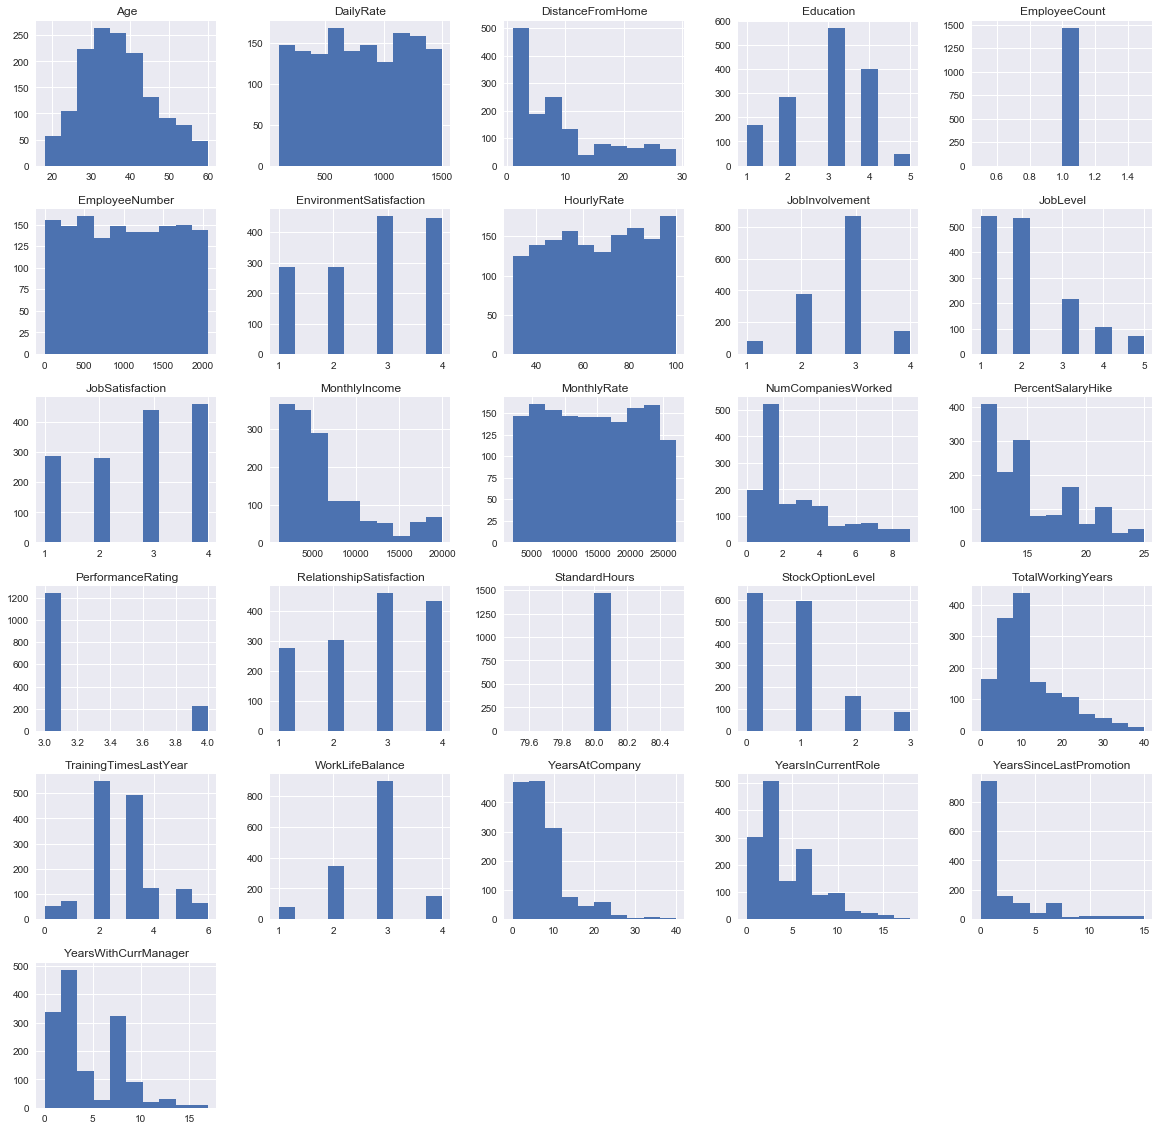

In [5]:
d1.hist(figsize=(20,20))
plt.show()

In [6]:
#check for missing data
d1.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
#Distirbution of Depdendent variable 
depdendent_var = d1['Attrition'].value_counts()
pcts = depdendent_var / depdendent_var.sum()
pcts

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

# 2. Data Preprocessing

In [8]:
#These fields does not add value, hence removed
d1 = d1.drop(['EmployeeCount','Over18'], axis = 1)

In [9]:
d1['Attrition']=d1['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

### One Hot Encoding

In [10]:
data_dummy=pd.get_dummies(d1)

In [11]:
data_dummy.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_

### Separating dependent & independent variables

In [12]:
y = data_dummy['Attrition']
X = data_dummy.drop(['Attrition'], axis=1)

### Feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

### Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=123)

# Modelling & Evaluation

In [15]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model (X_train, y_train, X_test, Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [16]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

C:\Users\ohrtwy\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


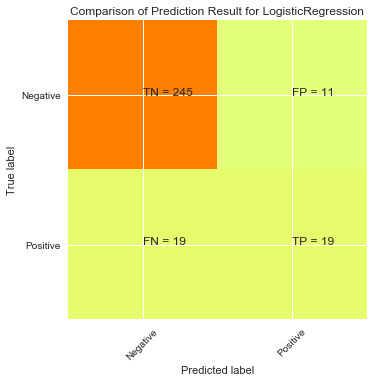

Accuracy of the Model LogisticRegression 89.8%


In [17]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

C:\Users\ohrtwy\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


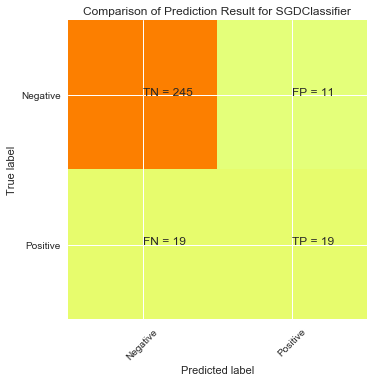

Accuracy of the Model SGDClassifier 89.8%


In [27]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
Model = "SGDClassifier"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

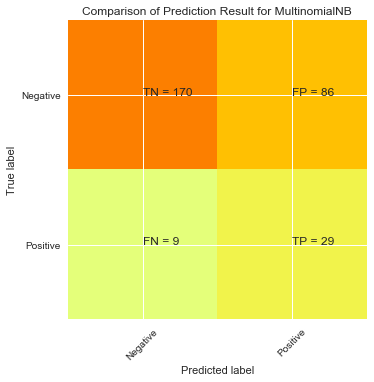

Accuracy of the Model MultinomialNB 67.7%


In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB  #Import packages related to Model
Model = "MultinomialNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

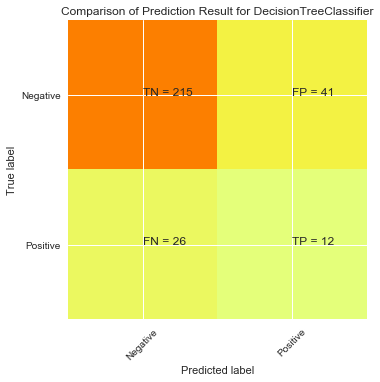

Accuracy of the Model DecisionTreeClassifier 77.2%


In [19]:
from sklearn.tree import DecisionTreeClassifier
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

C:\Users\ohrtwy\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


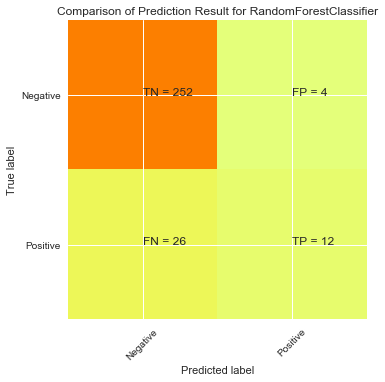

Accuracy of the Model RandomForestClassifier 89.8%


In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

C:\Users\ohrtwy\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


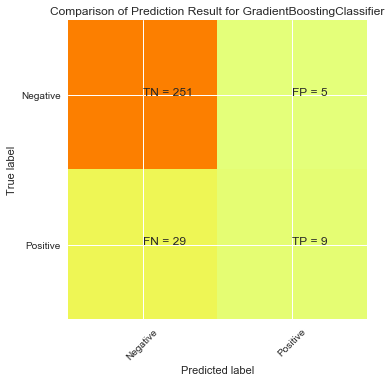

Accuracy of the Model GradientBoostingClassifier 88.4%


In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
Model = "GradientBoostingClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

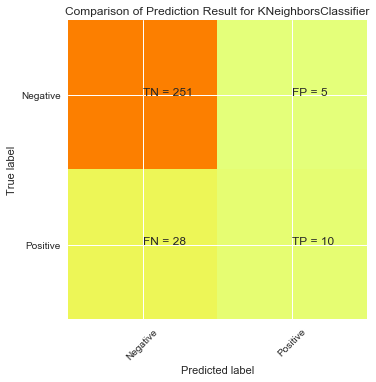

Accuracy of the Model KNeighborsClassifier 88.8%


In [24]:
from sklearn.neighbors import KNeighborsClassifier
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)